# Solução da Lista de Zero de Funções

## Métricas de Erros

In [1]:
# Erro baseado no valor absoluto da função f
function err_f(f, x_history)
    return abs(f(x_history[end]))
end;

In [2]:
# Erro baseado no incremento do valor de x
function err_dx(f, x_history)
    if length(x_history) > 1
        return abs(x_history[end] - x_history[end-1])
    else
        return err_f(f, x_history)
    end
end;

In [3]:
# Erro baseado no incremento relativo do valor de x
function err_rel(f, x_history)
    if length(x_history) > 1
        if abs(x_history[end]) < 1e-15
            return err_dx(f, x_history)
        else
            return abs(1 - x_history[end-1] / x_history[end])
        end
    else
        return err_f(f, x_history)
    end
end;

## Método da Bisseção

In [4]:
function cn_bisection(f, a, b; err=x->err_f(f,x), tol=1e-4, nitemax=100)
    
    # Inicializa número de iterações e valor da variável x
    nite = 0
    x = (a + b) / 2.
        
    # Checa condição de existência de raiz
    if f(a) * f(b) > 0
        println("O método da bisseção não pode ser utilizado")
        return x, nite
    end
    
    # Inicializa vetor com histórico dos valores de x
    x_history = zeros(nitemax + 1)
    x_history[1] = x

    # Iterações
    while err(x_history[1:nite+1]) > tol && nite < nitemax
        
        # Atualiza os limites a, b
        if f(a) * f(x) > 0
            a = x
        else
            b = x
        end

        # Atualiza variável e número de iterações
        x = (a + b) / 2.
        nite = nite + 1
        
        # Atualiza histórico da variável x
        x_history[nite + 1] = x
    end
    
    # Retorna valor da variável e número de iterações
    return x_history[1 : nite + 1], nite
    
end;

## Método das Cordas

In [5]:
function cn_cordas(f, a, b; err=x->err_f(f,x), tol=1e-4, nitemax=100)
    
    # Inicializa número de iterações e valor da variável x
    nite = 0
    x = (b * f(a) - a * f(b)) / (f(a) - f(b))
        
    # Checa condição de existência de raiz
    if f(a) * f(b) > 0
        println("O método das cordas não pode ser utilizado")
        return x, nite
    end
    
    # Inicializa vetor com histórico dos valores de x
    x_history = zeros(nitemax + 1)
    x_history[1] = x

    # Iterações
    while err(x_history[1:nite+1]) > tol && nite < nitemax
        
        # Atualiza os limites a, b
        if f(a) * f(x) > 0
            a = x
        else
            b = x
        end

        # Atualiza variável e número de iterações
        x = (b * f(a) - a * f(b)) / (f(a) - f(b))
        nite = nite + 1
        
        # Atualiza histórico da variável x
        x_history[nite + 1] = x
    end
    
    # Retorna valor da variável e número de iterações
    return x_history[1 : nite + 1], nite
    
end;

## Método de Newton- Raphson

In [6]:
function cn_newton(f, df, x; err=x->err_f(f,x), tol=1e-4, nitemax=100)
    
    # Inicializa número de iterações
    nite = 0
    
    # Inicializa vetor com histórico dos valores de x
    x_history = zeros(nitemax + 1)
    x_history[1] = x

    # Iterações
    while err(x_history[1:nite+1]) > tol && nite < nitemax
        
        # Atualiza variável e número de iterações
        x = x - f(x) / df(x)
        nite = nite + 1
        
        # Atualiza histórico da variável x
        x_history[nite + 1] = x
    end
    
    # Retorna valor da variável e número de iterações
    return x_history[1 : nite + 1], nite
    
end;

## Questão 1

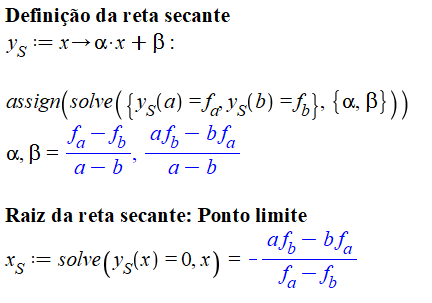

## Questão 2

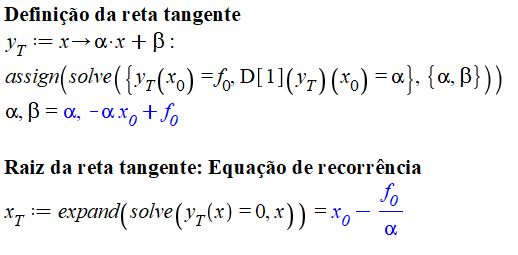

## Questão 3

In [7]:
V3(r, L, h) = (r^2 * acos((r-h)/r) - (r-h)*sqrt(2*r*h - h^2)) * L
f3(h) = V3(2., 5., h) - 8.;

In [8]:
x_b, nite_b = cn_bisection(f3, 0., 1., tol=1e-4)

([0.5, 0.75, 0.625, 0.6875, 0.71875, 0.734375, 0.7421875, 0.73828125, 0.740234375, 0.7392578125, 0.73974609375, 0.739990234375, 0.7401123046875, 0.74005126953125, 0.740020751953125], 14)

## Questão 4

In [9]:
ω, y_0 = 10., 5.
y4(x, T_A) = T_A / ω * cosh(ω/T_A * x) + y_0 - T_A / ω

f4(T_A) = y4(50., T_A) - 15.;
using ForwardDiff
df4(T_A) = ForwardDiff.derivative(f4, T_A);

In [10]:
x_b, nite_b = cn_bisection(f4, eps(), 5_000., tol=1e-4)

([2500.0, 1250.0, 1875.0, 1562.5, 1406.25, 1328.125, 1289.0625, 1269.53125, 1259.765625, 1264.6484375, 1267.08984375, 1265.869140625, 1266.4794921875, 1266.17431640625, 1266.326904296875], 14)

In [11]:
x_c, nite_c = cn_cordas(f4, 500., 3_000., tol=1e-4)

([2366.3773431387986, 1965.1233527725926, 1710.7093053724777, 1549.1837133514866, 1446.5027222123897, 1381.1590880209815, 1339.5414852555548, 1313.0190510362615, 1296.1094820284877, 1285.32559755777  …  1266.8462988138774, 1266.6573972461497, 1266.5368638110099, 1266.4599542233511, 1266.410879929875, 1266.3795666884278, 1266.359586377068, 1266.3468373618705, 1266.338702482274, 1266.3335117851827], 26)

In [12]:
x_n, nite_n = cn_newton(f4, df4, 100.)

([100.0, 124.2473030158206, 162.263892859291, 226.26321392239365, 339.44428576745474, 533.8356166386474, 815.1111880557784, 1097.4584206494756, 1242.8668795556916, 1265.8730616524995, 1266.3241934259265], 10)

In [13]:
T_A = x_n[end]

1266.3241934259265

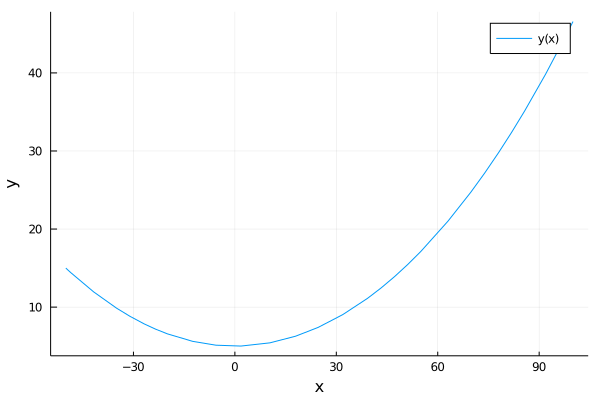

In [14]:
using Plots
gr(xlabel="x", ylabel="y")
plot(x -> y4(x, T_A), -50., 100., label="y(x)")

## Questão 5

In [15]:
f5(d, k_1, k_2, m, g, h) = 2/5*k_2*d^2.5 + 0.5*k_1*d^2 - m*g*d - m*g*h
f5(d) = f(d, 40_000., 40., 95., 9.81, 0.43);

In [16]:
x_c, nite_c = cn_cordas(f5, 0., 1., tol=1e-4)

LoadError: [91mUndefVarError: f not defined[39m

## Questão 6

In [17]:
y6(x, v_0, y_0, g, θ_0) = x * tan(θ_0) - g/(2*v_0^2 * cos(θ_0)^2) * x^2 + y_0
f6(θ_0) = y6(90., 30., 1.8, 9.81, θ_0) - 1.;

In [18]:
x_b, nite_b = cn_bisection(f6, 0., pi/4-eps(), tol=1e-4)

([0.39269908169872403, 0.589048622548086, 0.687223392972767, 0.6381360077604266, 0.6626797003665967, 0.6504078540635116, 0.6565437772150542, 0.6596117387908255, 0.6611457195787112, 0.661912709972654, 0.6622962051696253, 0.662487952768111, 0.6625838265673538, 0.6625358896677325, 0.6625119212179218], 14)

In [19]:
x_b, nite_b = cn_bisection(f6, pi/4+eps(), pi/2-eps(), tol=1e-4)

([1.1780972450961724, 0.9817477042468105, 0.8835729338221294, 0.93266031903447, 0.9081166264282997, 0.8958447801252145, 0.9019807032767571, 0.8989127417009858, 0.9004467224888715, 0.8996797320949286, 0.8992962368979571, 0.8994879844964428, 0.8993921106972, 0.8994400475968214, 0.8994160791470107, 0.8994040949221054, 0.8993981028096527], 16)

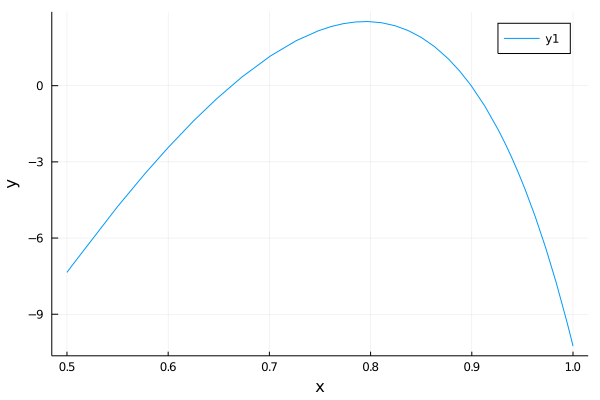

In [20]:
plot(f6, 0.5, 1.)

## Questão 7

In [21]:
Q7(S, H, n, B) = sqrt(S) * (B*H)^(5/3.) / (n*(B+2*H)^2/3.)
f7(H) = Q7(0.0002, H, 0.03, 20.) - 5.;

In [22]:
x_b, nite_b = cn_bisection(f7, 0., 10., err=x->err_rel(f7,x), tol=0.05/100.)

([5.0, 7.5, 8.75, 8.125, 7.8125, 7.65625, 7.734375, 7.6953125, 7.71484375, 7.705078125, 7.7099609375, 7.71240234375], 11)